In [2]:
import pandas as pd

# Reading the 2 csv files using pandas
df_cus = pd.read_csv("dim_customers.csv")
df_spends = pd.read_csv("fact_spends.csv")

In [4]:
# Understanding the data
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     4000 non-null   object
 1   age_group       4000 non-null   object
 2   city            4000 non-null   object
 3   occupation      4000 non-null   object
 4   gender          4000 non-null   object
 5   marital status  4000 non-null   object
 6   avg_income      4000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 218.9+ KB


In [8]:
df_cus.head(5)

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376


In [11]:
# Confirming all 4000 entries have unique customer_id

df_cus["customer_id"].is_unique


True

In [9]:
df_cus.nunique()

customer_id       4000
age_group            4
city                 5
occupation           5
gender               2
marital status       2
avg_income        3819
dtype: int64

In [12]:
df_spends.columns

Index(['customer_id', 'month', 'category', 'payment_type', 'spend'], dtype='object')

In [13]:
df_spends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   864000 non-null  object
 1   month         864000 non-null  object
 2   category      864000 non-null  object
 3   payment_type  864000 non-null  object
 4   spend         864000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 33.0+ MB


In [14]:
df_spends.isnull().sum()


customer_id     0
month           0
category        0
payment_type    0
spend           0
dtype: int64

In [10]:
df_spends.nunique()

customer_id     4000
month              6
category           9
payment_type       4
spend           5744
dtype: int64

In [11]:
df_spends['category'].unique()

array(['Health & Wellness', 'Groceries', 'Electronics', 'Bills',
       'Entertainment', 'Apparel', 'Food', 'Others', 'Travel'],
      dtype=object)

In [12]:
df_spends['payment_type'].unique()

array(['Credit Card', 'UPI', 'Debit Card', 'Net Banking'], dtype=object)

In [14]:
# descriptive statistics of numerical column in the dataframe
df_cus.describe()

,avg_income
count,4000.000000
mean,51657.032250
std,14690.140645
min,24816.000000
25%,38701.000000
50%,50422.000000
75%,64773.250000
max,86600.000000


In [15]:
df_spends.describe()

,spend
count,864000.000000
mean,614.464994
std,661.571676
min,6.000000
25%,191.000000
50%,395.000000
75%,793.000000
max,10313.000000


In [19]:
df_spends[df_spends['spend']== df_spends['spend'].min()]

,customer_id,month,category,payment_type,spend
285145,ATQCUS2067,June,Bills,Net Banking,6
516611,ATQCUS0643,June,Others,Net Banking,6
829694,ATQCUS3610,May,Others,Net Banking,6


In [21]:
df_spends[df_spends.duplicated()].sum()

customer_id     0
month           0
category        0
payment_type    0
spend           0
dtype: object

Both dataframes are clean data. Proceeding to Exploratory Data Analysis.

In [3]:
# What is the overall distribution of customers across different age groups?
Age_group_distribution = df_cus['age_group'].value_counts()
Age_group_distribution

age_group
25-34    1498
35-45    1273
21-24     691
45+       538
Name: count, dtype: int64

<AxesSubplot:xlabel='city'>

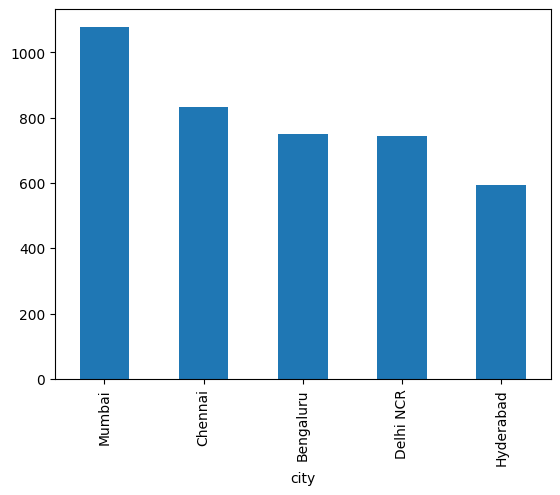

In [116]:
# What is the location distribution of sample data?
city_distribution = df_cus['city'].value_counts()
city_distribution.plot(kind="bar")

In [107]:
# What is the occupation distribution of sample data?
occupation_distribution = df_cus['occupation'].value_counts()
occupation_distribution

occupation
Salaried IT Employees       1294
Salaried Other Employees     893
Freelancers                  784
Business Owners              630
Government Employees         399
Name: count, dtype: int64

In [17]:
# What is the gender distribution among the customers?
gender_distribution = df_cus['gender'].value_counts()
gender_distribution

gender
Male      2597
Female    1403
Name: count, dtype: int64

In [7]:
# What is the marital status distribution of sample data?
marital_status_distribution = df_cus['marital status'].value_counts()
marital_status_distribution

marital status
Married    3136
Single      864
Name: count, dtype: int64

In [112]:
# What is the Age-group distribution of sample data?
Age_group_distribution = df_cus['age_group'].value_counts()
Age_group_distribution

age_group
25-34    1498
35-45    1273
21-24     691
45+       538
Name: count, dtype: int64

In [57]:
#How is spending distributed across different months?
month_summary = df_spends.groupby('month')['spend'].agg(['min', 'max', 'median'])
month_summary.sort_values(by='median')

,min,max,median
month,,,
May,6,5806,309.0
June,6,6580,360.0
July,10,6963,367.0
October,10,6874,391.0
August,12,8878,460.0
September,14,10313,525.0


In [114]:
#Which month has the highest total spending, and which has the lowest?
total_spending_month = df_spends.groupby('month')['spend'].sum()
total_spending_month.sort_values()

month
May           68139836
June          79318104
July          80624751
October       86026137
August       100859350
September    115929577
Name: spend, dtype: int64

In [37]:
# What is the minimum , maximum and average spending on each payment_type
payment_type_summary = df_spends.groupby('payment_type')['spend'].agg(['min', 'max', 'median'])
payment_type_summary

,min,max,median
payment_type,,,
Credit Card,31,10313,716.0
Debit Card,12,6563,389.0
Net Banking,6,3776,177.0
UPI,21,6448,490.0


In [115]:
# What is the average spending for each category, and which category has the highest average spending?
category_summary = df_spends.groupby('category')['spend'].agg(['min', 'max', 'median'])
category_summary.sort_values(by='median')

,min,max,median
category,,,
Others,6,1790,130.0
Apparel,10,5430,236.0
Entertainment,13,4905,290.0
Food,27,3071,376.0
Travel,18,6368,466.0
Health & Wellness,18,9055,469.0
Electronics,25,7950,620.0
Groceries,14,7396,717.0
Bills,6,10313,800.0


In [34]:
#Is there a relationship between payment type and spending amount? (e.g., average spend for Credit Card vs. Debit Card)
high_spend = df_spends[df_spends['spend']>6500]
high_spend.groupby('payment_type')['spend'].describe()


,count,mean,std,min,25%,50%,75%,max
payment_type,,,,,,,,
Credit Card,211.0,7332.037915,704.728309,6511.0,6797.0,7158.0,7764.0,10313.0
Debit Card,1.0,6563.000000,NaN,6563.0,6563.0,6563.0,6563.0,6563.0


In [117]:
# Finding the total spending by individual customer for the period of 6 months
total_spending_customer = df_spends.groupby('customer_id')['spend'].sum().reset_index()
total_spending_customer.describe()

,spend
count,4000.000000
mean,132724.438750
std,54988.167095
min,35265.000000
25%,90933.750000
50%,120392.500000
75%,163112.500000
max,315201.000000


In [85]:
# Which month do the customers have the maximum spending?
total_spending_customer_month = df_spends.groupby(['customer_id','month'])['spend'].sum().reset_index()
total_spending_customer_month.shape

,customer_id,month,spend
0,ATQCUS0001,August,33776
1,ATQCUS0001,July,29451
2,ATQCUS0001,June,26316
3,ATQCUS0001,May,19480
4,ATQCUS0001,October,25262
...,...,...,...
23995,ATQCUS4000,July,8456
23996,ATQCUS4000,June,8874
23997,ATQCUS4000,May,7497
23998,ATQCUS4000,October,9171


In [88]:
pivot_table = total_spending_customer_month.pivot(index='customer_id', columns='month', values='spend')
pivot_table["max_month"] = pivot_table.idxmax(axis=1)
pivot_table["max_month"].value_counts()

max_month
September    2979
August        898
October        87
July           20
June           16
Name: count, dtype: int64

In [93]:
#Which categories have the highest and lowest spending?
total_spending_category = df_spends.groupby(['category'])['spend'].sum().reset_index()
total_spending_category.sort_values(by='spend',ascending=False)

,category,spend
1,Bills,104912768
5,Groceries,86303761
2,Electronics,79562220
6,Health & Wellness,65599867
8,Travel,59223324
4,Food,44013470
3,Entertainment,41289162
0,Apparel,34036001
7,Others,15957182


In [98]:
#How does the average spending vary among different professions?

# Merging total spending per customer with dim_customer
merged_df = pd.merge(total_spending_customer,df_cus,on="customer_id")

# Finding average spending 
merged_df['avg_spend']=merged_df['spend']/6 

merged_df

,customer_id,spend,age_group,city,occupation,gender,marital status,avg_income,avg_spend
0,ATQCUS0001,170545,21-24,Mumbai,Salaried IT Employees,Male,Married,49767,28424.166667
1,ATQCUS0002,168514,21-24,Mumbai,Salaried IT Employees,Male,Married,47336,28085.666667
2,ATQCUS0003,157534,21-24,Mumbai,Salaried IT Employees,Male,Married,48851,26255.666667
3,ATQCUS0004,162655,21-24,Mumbai,Salaried IT Employees,Male,Married,45425,27109.166667
4,ATQCUS0005,157296,21-24,Mumbai,Salaried IT Employees,Male,Married,46732,26216.000000
...,...,...,...,...,...,...,...,...,...
3995,ATQCUS3996,99589,25-34,Chennai,Business Owners,Female,Single,68003,16598.166667
3996,ATQCUS3997,56264,25-34,Chennai,Freelancers,Female,Single,33323,9377.333333
3997,ATQCUS3998,59760,25-34,Chennai,Freelancers,Female,Single,33336,9960.000000
3998,ATQCUS3999,67142,25-34,Chennai,Freelancers,Female,Single,37453,11190.333333


In [102]:
Avg_spending_occupation = merged_df.groupby(['occupation'])['avg_spend'].median().reset_index()
Avg_spending_occupation.sort_values(by='avg_spend',ascending=False)

,occupation,avg_spend
3,Salaried IT Employees,30747.000000
0,Business Owners,23088.333333
1,Freelancers,16053.166667
4,Salaried Other Employees,16045.333333
2,Government Employees,14836.833333


Data Processing

In [108]:
# calculating Average Income Utilisation Percentage
merged_df['AIUP'] = merged_df['avg_spend']/merged_df['avg_income']


In [109]:
# Omitting the columns that are being repeated
AIUP_Customer = merged_df[['customer_id', 'spend', 'avg_spend', 'AIUP']]
AIUP_Customer

,customer_id,spend,avg_spend,AIUP
0,ATQCUS0001,170545,28424.166667,0.571145
1,ATQCUS0002,168514,28085.666667,0.593326
2,ATQCUS0003,157534,26255.666667,0.537464
3,ATQCUS0004,162655,27109.166667,0.596790
4,ATQCUS0005,157296,26216.000000,0.560986
...,...,...,...,...
3995,ATQCUS3996,99589,16598.166667,0.244080
3996,ATQCUS3997,56264,9377.333333,0.281407
3997,ATQCUS3998,59760,9960.000000,0.298776
3998,ATQCUS3999,67142,11190.333333,0.298783
